In [2]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dir = "../"

In [4]:
def getHistoDF(index):
    name = "c_5r7_" + str(index)
    file_name = dir + name + ".histo"
    f = open(file_name, "r")
    ranges = []
    result = []

    for line in f:
        range, freq = line.strip().split(" ")
        if (range == "neg"):
            ranges.append(0)
        else:
            ranges.append(float(range))
        result.append(int(freq))
        
    df = pd.DataFrame(data={"ranges": ranges, "values": result})
    f.close()
    return name, df

In [5]:
def generateData(init, final, formatter):
    dfs = {}
    ranges = pd.Series
    for i in range(init, final):
        title, df = getHistoDF(i)
        values = formatter(df["values"])
        ranges = formatter(df["ranges"])
        dfs[title] = values
    return ranges, dfs

In [6]:
ranges, dfs = generateData(0, 5, formatter=lambda x: np.array(x)[:5])

In [9]:
def plotDF(dfs, ranges):
    df = pd.DataFrame(dfs, index=ranges)
    ax = df.plot.bar(rot=0, width=0.8, figsize=(10, 5), title="Elementos por refinar por threshold para primeras 5 iteraciones", ylabel="Frecuencia elementos de mala calidad", xlabel="Threshold")
    for container in ax.containers:
        ax.bar_label(container, padding=3)

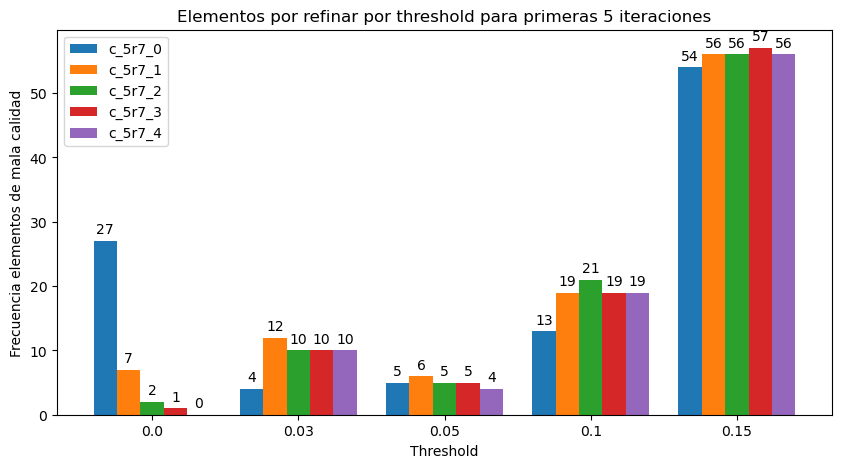

In [10]:
plotDF(dfs, ranges)

In [16]:
def getMapPtsOcts(index, po, r):
    name = "c_5r7_" + str(index)
    file_name = dir + name + ".map"
    f = open(file_name, "r")
    
    for line in f:
        p, lo = line.strip().split(":")
        lo = lo.strip().split(" ")
        lo = list(map(int, lo))
        p = p.strip()
        if p in po.keys():
            # flag = True
            # print("existe en diccionario: point: ", p, "iteration: ", index)
            aux = po[p]
            po[p] = aux + lo
            if p in r.keys():
                aux2 = r[p]
                r[p] = aux2 + [ index ]
            else:
                r[p] = [index]
        else:
            po[p] = lo
            r[p] = [index] 
    f.close()
    

In [18]:
m = {} # diccionario de puntos-> octantes
r = {}
for i in range(4):
    getMapPtsOcts(i, m, r)
    
l1 = []
l2 = []
for k, v in r.items():
    if (len(v) == 2):
        l1.append((k,v))
    if (len(v) > 3):
        l2.append((k,v))
print(l1)



        
# print(r)

[]
